<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M14_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns
#carregando o dt set e visualizando-o
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# selecionando as colunas, agrupando-as e somando o resultado

diamonds = data[['cut', 'price']].groupby(['cut']).agg('sum').reset_index()
diamonds

,cut,price
0,Ideal,74513487
1,Premium,63221498
2,Very Good,48107623
3,Good,19275009
4,Fair,7017600


<ipython-input-3-3fded4a5e2a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gra_diamonds = sns.barplot\


[Text(0.5, 1.0, 'Preço dos cortes de diamantes'),
 Text(0, 0.5, 'Preço (milhões)'),
 Text(0.5, 0, 'Tipo de corte')]

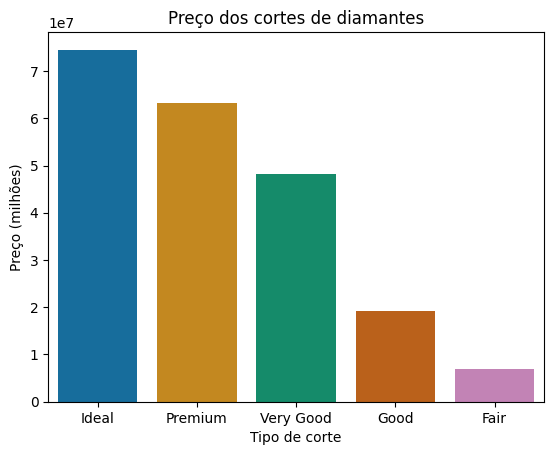

In [3]:
#criando o grafico  e inserindo legendas e títulos
gra_diamonds = sns.barplot\
 (data=diamonds,\
  x='cut',\
  y='price',\
  errorbar=None,\
  palette='colorblind')
gra_diamonds.set\
 (title='Preço dos cortes de diamantes',\
  ylabel='Preço (milhões)', \
  xlabel='Tipo de corte')

**Insight do gráfico 1**: ...

---

## 2\. Número de passageiros em dezembro por ano

In [4]:
import seaborn as sns
#importando o dataframe
data = sns.load_dataset("flights")
data.head(20)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [5]:
#agrupando por mês e ano, e somando os meses
flights = data[['year', 'month', 'passengers']].groupby(['year','month']).agg('sum').reset_index()
flights[['month']].agg('sum')

<ipython-input-5-5b083fdf5248>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights[['month']].agg('sum')


Series([], dtype: float64)

In [6]:
#localizando as ocorrências onde o mês for dezembro
voo_dezembro = data.loc[data['month']=='Dec']
voo_dezembro

,year,month,passengers
11,1949,Dec,118
23,1950,Dec,140
35,1951,Dec,166
47,1952,Dec,194
59,1953,Dec,201
71,1954,Dec,229
83,1955,Dec,278
95,1956,Dec,306
107,1957,Dec,336
119,1958,Dec,337


<ipython-input-7-d1a9b29b72c0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico_voos = sns.relplot(data=voo_dezembro, x='year', y='passengers', palette='colorblind')


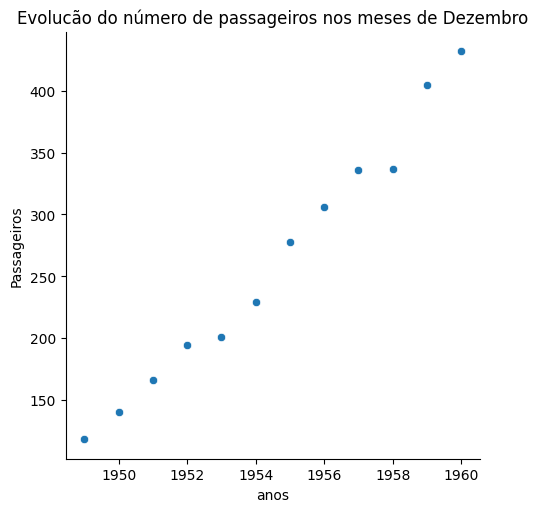

In [7]:
#criando o grafico usando apenas os meses de dezembro
grafico_voos = sns.relplot(\
                           data=voo_dezembro, \
                           x='year', \
                           y='passengers',\
                           palette='colorblind')
grafico_voos.set(\
                 title='Evolucão do número de passageiros nos meses de Dezembro',\
                 xlabel='anos',\
                 ylabel='Passageiros')

**Insight do gráfico 2**: ...

<ipython-input-8-9d728ea48c9a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico_voos = sns.lineplot\


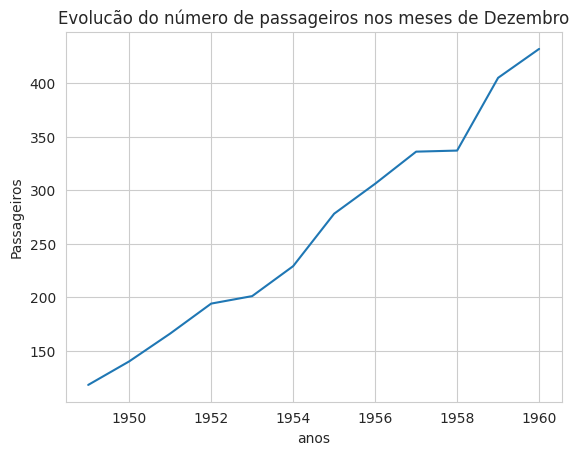

In [8]:
#outro tipo de gráfico para facilitar o visualização
with sns.axes_style('whitegrid'):
  grafico_voos = sns.lineplot\
   (data=voo_dezembro, x='year', y='passengers', palette='pastel')
  grafico_voos.set\
   (title='Evolucão do número de passageiros nos meses de Dezembro',\
    xlabel='anos',\
    ylabel='Passageiros')

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [9]:
import seaborn as sns
#importando o dataframe
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [10]:
#filtrando apenas os anos anteriores a 1959
antes_1959 = data[(data['year'] <= 1959)]
antes_1959

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
127,1959,Aug,559
128,1959,Sep,463
129,1959,Oct,407
130,1959,Nov,362


**Insight do gráfico 3**: ...

<ipython-input-11-10eb58569967>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agrupamento['month'], y=agrupamento['passengers'], palette='colorblind')


<Axes: xlabel='month', ylabel='passengers'>

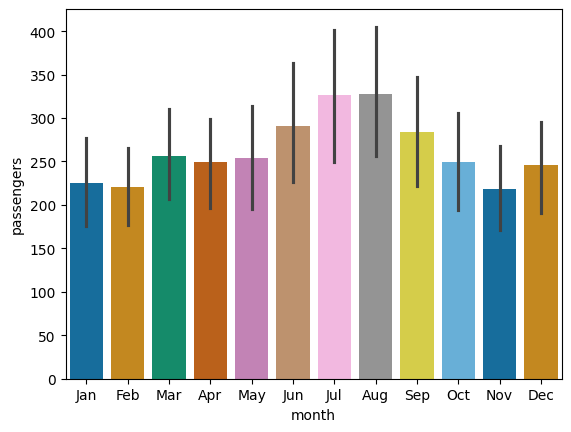

In [11]:
#criando um gráfico
agrupamento = antes_1959.groupby(['year', 'month']).sum()
agrupamento = agrupamento.reset_index()
sns.barplot(x=agrupamento['month'],\
            y=agrupamento['passengers'],\
            palette='colorblind')

---